In [363]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [364]:
# ==========================
# 1. Chargement du dataset
# ==========================

In [365]:
# Charger le dataset
dataset = pd.read_csv("Advertising.csv")

# Sélection des features et de la cible
X = dataset[['TV', 'Radio', 'Newspaper']].values  # Matrice des variables explicatives
y = dataset['Sales'].values.reshape(-1, 1)  # Variable cible
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [366]:
def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [367]:
# Séparer les données en ensemble d'entraînement et de test

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (160, 3)
x_test shape  :  (40, 3)
y_train shape  :  (160, 1)
y_test shape  :  (40, 1)


In [368]:
# Normalization de x_train
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm


array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [369]:
x_train_norm.mean()

np.float64(9.251858538542972e-17)

In [370]:
x_train_norm.std()

np.float64(1.0)

In [371]:
# Normalization de x_test
x_test_norm= (x_test - mean)/std
x_test_norm

array([[ 0.15781217,  0.59112727,  1.13227461],
       [ 0.53925283,  1.68199613,  1.13227461],
       [ 1.69783431,  0.36753303,  0.65380096],
       [-1.64363349,  0.95023317,  0.75245532],
       [ 0.83513672,  1.77007871, -1.31928629],
       [-0.89025846,  0.82149709,  1.12240918],
       [ 0.79354661,  1.42452397, -0.13543394],
       [-1.18851892, -0.76398933, -0.56951314],
       [ 0.86009078, -1.31958713, -0.8309472 ],
       [ 0.29803023, -0.02545078,  0.07667294],
       [-1.40835233,  0.11683646, -1.36861347],
       [-1.11484502, -1.16374872, -0.01211599],
       [ 1.00387371, -1.31958713,  2.70581169],
       [-1.71849568,  0.47594236, -1.01345777],
       [-0.12500054, -1.40766971, -0.16503025],
       [ 0.23980408, -1.02146148,  0.25918351],
       [-1.69591819,  0.35398186,  0.56501203],
       [ 0.56539519,  0.02875388, -0.7766873 ],
       [-0.88788188, -0.17451361,  0.12600012],
       [ 1.03833409,  0.31332837, -0.93453428],
       [ 0.94445928,  0.63855635,  2.182

In [372]:
#x train:
X_train_norm_1 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_train_norm_1

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01,
         1.00000000e+00],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00,
         1.00000000e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01,
         1.00000000e+00],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01,
         1.00000000e+00],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01,
         1.00000000e+00],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01,
         1.00000000e+00],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01,
         1.00000000e+00],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01,
         1.00000000e+00],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01,
         1.00000000e+00],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01,
         1.00000000e+00],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01,
         1.00000000e+00],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01,
      

In [373]:
X_test_norm_1 = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
X_test_norm_1

array([[ 0.15781217,  0.59112727,  1.13227461,  1.        ],
       [ 0.53925283,  1.68199613,  1.13227461,  1.        ],
       [ 1.69783431,  0.36753303,  0.65380096,  1.        ],
       [-1.64363349,  0.95023317,  0.75245532,  1.        ],
       [ 0.83513672,  1.77007871, -1.31928629,  1.        ],
       [-0.89025846,  0.82149709,  1.12240918,  1.        ],
       [ 0.79354661,  1.42452397, -0.13543394,  1.        ],
       [-1.18851892, -0.76398933, -0.56951314,  1.        ],
       [ 0.86009078, -1.31958713, -0.8309472 ,  1.        ],
       [ 0.29803023, -0.02545078,  0.07667294,  1.        ],
       [-1.40835233,  0.11683646, -1.36861347,  1.        ],
       [-1.11484502, -1.16374872, -0.01211599,  1.        ],
       [ 1.00387371, -1.31958713,  2.70581169,  1.        ],
       [-1.71849568,  0.47594236, -1.01345777,  1.        ],
       [-0.12500054, -1.40766971, -0.16503025,  1.        ],
       [ 0.23980408, -1.02146148,  0.25918351,  1.        ],
       [-1.69591819,  0.

In [374]:
# =============================================
# 2. Régression multiple avec descente de gradient
# =============================================

In [375]:

# Initialiser le vecteur theta aléatoirement
theta = np.random.randn(X_train_norm_1.shape[1], 1)
theta

array([[0.45108966],
       [0.96850505],
       [0.7691142 ],
       [0.20178947]])

In [376]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [377]:
cost_function(X_train_norm_1, y_train, theta)

np.float64(105.11413151685333)

In [378]:
# Paramètres de la descente de gradient
n_iterations = 200
learning_rate = 0.3

#entrainement:
theta_final, cost_history = gradient_descent(X_train_norm_1, y_train, theta, learning_rate, n_iterations)

theta_final


array([[ 3.76419618],
       [ 2.79230665],
       [ 0.05597551],
       [14.1       ]])

In [379]:
cost_history

array([52.18650951, 26.30451238, 13.62433744,  7.40137023,  4.34200835,
        2.8349813 ,  2.09085493,  1.72231987,  1.53909023,  1.44753106,
        1.40147926,  1.37812103,  1.36614662,  1.35992644,  1.35664332,
        1.35487768,  1.35390786,  1.35336283,  1.35304919,  1.35286442,
        1.35275315,  1.3526848 ,  1.35264207,  1.35261497,  1.35259758,
        1.35258632,  1.35257897,  1.35257415,  1.35257097,  1.35256887,
        1.35256748,  1.35256655,  1.35256594,  1.35256553,  1.35256526,
        1.35256507,  1.35256495,  1.35256487,  1.35256482,  1.35256478,
        1.35256476,  1.35256474,  1.35256473,  1.35256473,  1.35256472,
        1.35256472,  1.35256472,  1.35256471,  1.35256471,  1.35256471,
        1.35256471,  1.35256471,  1.35256471,  1.35256471,  1.35256471,
        1.35256471,  1.35256471,  1.35256471,  1.35256471,  1.35256471,
        1.35256471,  1.35256471,  1.35256471,  1.35256471,  1.35256471,
        1.35256471,  1.35256471,  1.35256471,  1.35256471,  1.35

In [380]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

predictions_manual = model(X_test_norm_1, theta_final)
r2_manual = coef_determination(y_test, predictions_manual)
print(f'R² Score (Descente de gradient): {r2_manual}')

R² Score (Descente de gradient): 0.899438024100912


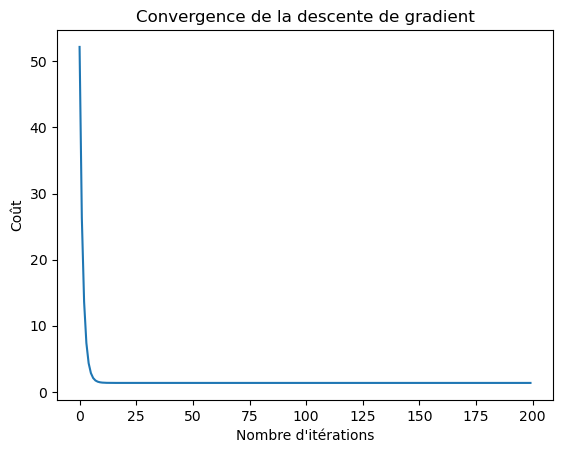

In [381]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()


In [382]:
# =====================================
# 3. Régression multiple avec Scikit-learn
# =====================================

In [383]:
from sklearn.preprocessing import StandardScaler

zscore_scaler = StandardScaler()

# Standardisation Z-score

X_train_zscore = zscore_scaler.fit_transform(x_train)

X_test_zscore = zscore_scaler.transform(x_test)

In [384]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(x_train[:, :-1], y_train)  # Enlever la colonne de biais pour scikit-learn

LinearRegression()

In [385]:
# Prédictions
y_pred = model.predict(x_test[:, :-1])

In [386]:
# Évaluation du modèle
r2_sklearn = r2_score(y_test, y_pred)
print(f'R² Score (Scikit-learn): {r2_sklearn}')

R² Score (Scikit-learn): 0.9005833101920356


In [387]:
# =============================
# 4. Comparaison des modèles
# =============================

In [388]:
# Comparaison des modèles
if r2_manual > r2_sklearn:
    print('Le modèle manuel avec descente de gradient donne de meilleurs résultats.')
else:
    print('Le modèle de scikit-learn est plus performant.')

Le modèle de scikit-learn est plus performant.


In [389]:
# ===============================
# 5. Visualisation des résultats
# ===============================

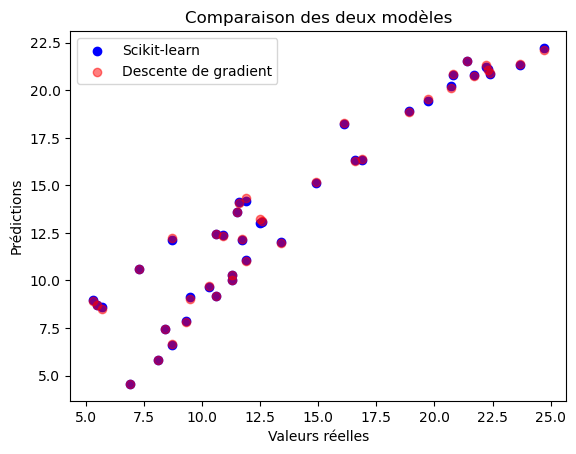

In [390]:
# Visualisation des prédictions vs valeurs réelles
plt.scatter(y_test, y_pred, color='blue', label='Scikit-learn')
plt.scatter(y_test, predictions_manual, color='red', label='Descente de gradient', alpha=0.5)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des deux modèles")
plt.legend()
plt.show()